In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/RobaeeDataset.zip

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
dirpath = "./RobaeeDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,از حلقهٔ گوش از دلم باخبر است در حلقهٔ او دل ...,moulavi
1,آنجا بنشین که همنشین مردانند تا دود کدورت ترا...,moulavi
2,دانیکه چه میگوید این بانگ رباب اندر پی من بیا...,moulavi
3,جان چو سمندرم نگاری دارد در آتش او چه خوش قرا...,moulavi
4,بیمارم و غم در امتحانم دارد اما غم او تر و جو...,moulavi
...,...,...
2167,در خدمت تو چو صرف شد عمر دراز گفتم که مگر با ...,abusaeed
2168,بر تافت عنان صبوری از جان خراب شد همچو ر کاب ح...,abusaeed
2169,آنها که ز معبود خبر یافته‌اند از جملهٔ کاینات...,abusaeed
2170,یار آمد و گفت خسته میدار دلت دایم به امید بست...,abusaeed


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        # u"\0x06F0-\0x06F9"
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,از حلقه گوش از دلم باخبر است در حلقه او دل از ...,moulavi
1,آنجا بنشین که همنشین مردانند تا دود کدورت ترا ...,moulavi
2,دانیکه چه می گوید این بانگ رباب اندر پی من بیا...,moulavi
3,جان چو سمندرم نگاری دارد در آتش او چه خوش قرار...,moulavi
4,بیمارم و غم در امتحانم دارد اما غم او تر و جوا...,moulavi
...,...,...
2167,در خدمت تو چو صرف شد عمر دراز گفتم که مگر با ت...,abusaeed
2168,بر تافت عنان صبوری از جان خراب شد همچو ر کاب ح...,abusaeed
2169,آنها که ز معبود خبر یافته اند از جمله کاینات س...,abusaeed
2170,یار آمد و گفت خسته میدار دلت دایم به امید بسته...,abusaeed


In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['abusaeed', 'attar', 'moulavi']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,از حلقه گوش از دلم باخبر است در حلقه او دل از ...,moulavi,2
1,آنجا بنشین که همنشین مردانند تا دود کدورت ترا ...,moulavi,2
2,دانیکه چه می گوید این بانگ رباب اندر پی من بیا...,moulavi,2
3,جان چو سمندرم نگاری دارد در آتش او چه خوش قرار...,moulavi,2
4,بیمارم و غم در امتحانم دارد اما غم او تر و جوا...,moulavi,2
...,...,...,...
2167,در خدمت تو چو صرف شد عمر دراز گفتم که مگر با ت...,abusaeed,0
2168,بر تافت عنان صبوری از جان خراب شد همچو ر کاب ح...,abusaeed,0
2169,آنها که ز معبود خبر یافته اند از جمله کاینات س...,abusaeed,0
2170,یار آمد و گفت خسته میدار دلت دایم به امید بسته...,abusaeed,0


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  # text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,حلقه گوش باخبر حلقه دل حلقه زبر چرخ غم ذره آفت...,moulavi
1,بنشین همنشین مردانند دود کدورت بنشانند اندیشه ...,moulavi
2,دانیکه بانگ رباب ره دریاب خطا بری صواب ره بری ...,moulavi
3,جان سمندرم نگاری آتش قراری باده لبهاش بگردان س...,moulavi
4,بیمارم غم امتحانم غم جوانم طرفه نگر رنجوری غمش...,moulavi
...,...,...
2167,خدمت صرف عمر دراز محرم راز دانستم تاز نرسم جها...,abusaeed
2168,تافت عنان صبوری جان خراب کاب حلقه تب تاب عنان ...,abusaeed
2169,معبود خبر کاینات دریوزه مردان نظر مردان قرب نظر,abusaeed
2170,یار خسته میدار دلت امید دلت شکستگان نظرها شکست...,abusaeed


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
from keras.utils import pad_sequences

In [ ]:
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 128
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df['poem'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 7124 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['poem'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2172, 128)


In [ ]:
Y = pd.get_dummies(df['poet']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2172, 3)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42, shuffle = True)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.1, random_state=42, shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)
print(X_val.shape,Y_val.shape)

(1737, 128) (1737, 3)
(44, 128) (44, 3)
(391, 128) (391, 3)


In [ ]:
import tensorflow as tf
loss = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 128, 100)          1000000   
                                                                 
 dropout_1 (Dropout)         (None, 128, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 1,080,703
Trainable params: 1,080,703
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 10
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
49/49 [==============================] - 47s 791ms/step - loss: 1.0863 - accuracy: 0.4082 - val_loss: 1.0565 - val_accuracy: 0.4253
Epoch 2/10
49/49 [==============================] - 37s 733ms/step - loss: 0.8505 - accuracy: 0.6014 - val_loss: 0.8387 - val_accuracy: 0.5517
Epoch 3/10
49/49 [==============================] - 32s 648ms/step - loss: 0.4254 - accuracy: 0.8484 - val_loss: 0.9566 - val_accuracy: 0.5920
Epoch 4/10
49/49 [==============================] - 34s 700ms/step - loss: 0.1675 - accuracy: 0.9469 - val_loss: 1.0245 - val_accuracy: 0.6034
Epoch 5/10
49/49 [==============================] - 31s 629ms/step - loss: 0.0610 - accuracy: 0.9827 - val_loss: 1.1062 - val_accuracy: 0.6437


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

2/2 [==============================] - 0s 47ms/step - loss: 0.7455 - accuracy: 0.7273
Test set
  Loss: 0.745
  Accuracy: 0.727


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

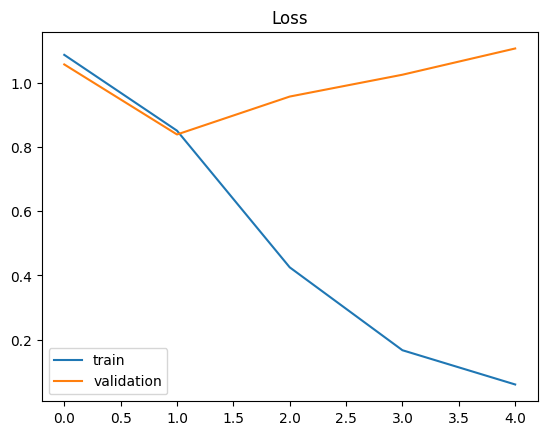

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

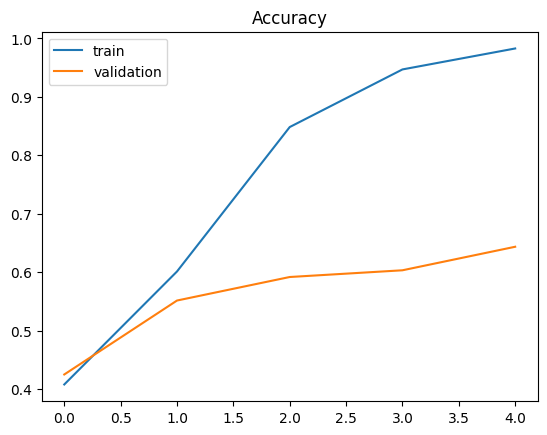

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

In [ ]:
predictions = model.predict(X_test)
predictions.tolist()

In [ ]:
labelsdf = pd.DataFrame(Y_test)

In [ ]:
ldf = pd.from_dummies(labelsdf)
ldf = ldf.values.tolist()

In [ ]:
Y_pred = predictions.argmax(axis=-1).tolist()
Y_pred

In [ ]:
from sklearn.metrics import classification_report

print()
print(classification_report(ldf, Y_pred, target_names=labels))
print()


              precision    recall  f1-score   support

    abusaeed       0.64      0.58      0.61        12
       attar       0.71      0.94      0.81        16
     moulavi       0.83      0.62      0.71        16

    accuracy                           0.73        44
   macro avg       0.73      0.72      0.71        44
weighted avg       0.74      0.73      0.72        44




In [ ]:
from sklearn.metrics import f1_score
print(f'F1: {f1_score(ldf, Y_pred, average="weighted")}')

F1: 0.7205884597188945


<Axes: >

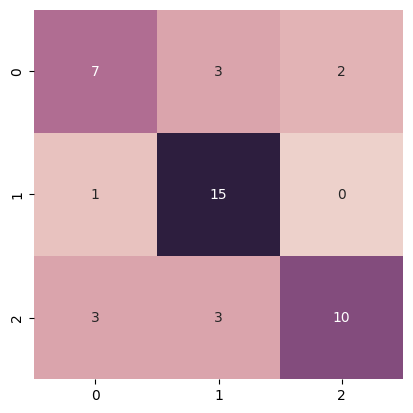

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(ldf, Y_pred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)